In [1]:
import torch
import numpy as np
import pandas as pd
from bliss.catalog import FullCatalog, TileCatalog
from astropy.io import fits
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

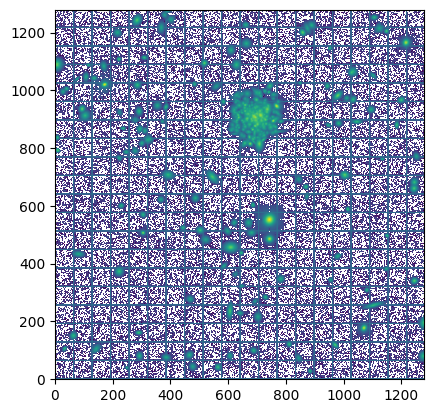

In [5]:
file_path = "/data/scratch/kapnadak/file_data/file_data_0.pt"
files = torch.load(file_path)
image_data = files[1]["images"][0,:,:]
dx, dy = 64, 64
grid_color = 1
image_data[:,::dy] = grid_color
image_data[::dx,] = grid_color
plt.imshow(image_data, norm=LogNorm(), origin="lower")

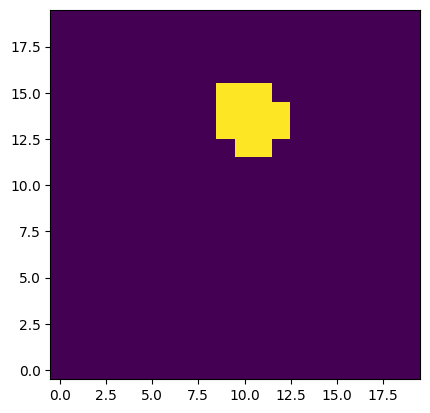

In [6]:
plt.imshow(files[1]["tile_catalog"]["membership"].squeeze(), origin="lower")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1280, 1280, 3])


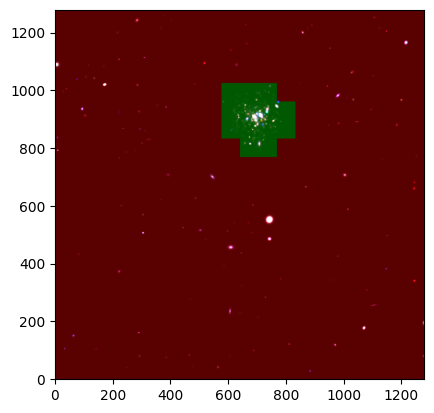

In [8]:
def create_overlay(predictions, tile_size):
    overlay = torch.zeros((predictions.size(0) * tile_size, predictions.size(1) * tile_size, 3))
    detection_color = torch.tensor([0.0, 1.0, 0.0])  # Green color
    non_detection_color = torch.tensor([1.0, 0.0, 0.0])  # Red color
    for i in range(predictions.size(0)):
        for j in range(predictions.size(1)):
            color = detection_color if predictions[i, j] == 1 else non_detection_color
            overlay[i*tile_size:(i+1)*tile_size, j*tile_size:(j+1)*tile_size] = color
    return overlay

def blend_images(original, overlay, alpha=0.5, img_crop=0):
    # Ensure the original image is in float
    if original.max() > 1.0:
        original = original / 255.0
    # Blend the images
    blended = original * (1 - alpha) + overlay * alpha
    blended = blended[img_crop: blended.size(0) - img_crop, img_crop: blended.size(1) - img_crop]
    print(blended.shape)
    return blended

crop = 0
n_tiles = 20
tile_size = 64
img_size = 1280

overlay = create_overlay(files[1]["tile_catalog"]["membership"].squeeze(), tile_size=64)
blended_image = blend_images(files[1]["images"][:3].permute(1,2,0), overlay, alpha=0.35, img_crop=crop*tile_size)
plt.imshow(blended_image, origin="lower")